In [125]:
# ==================== CELL 1: IMPORT LIBRARIES ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [126]:
# ==================== CELL 2: LOAD DATASET ====================
url = "https://raw.githubusercontent.com/KhushiC04/OIBSIP/main/Task1_Retail_Sales_EDA/retail_sales_dataset.csv"
df = pd.read_csv(url)

print("✅ Dataset loaded successfully!")
print(f"📊 Dataset Shape: {df.shape} (Rows: {df.shape[0]}, Columns: {df.shape[1]})")
print("\n🔍 First 5 rows of the dataset:")
print(df.head())

✅ Dataset loaded successfully!
📊 Dataset Shape: (1000, 9) (Rows: 1000, Columns: 9)

🔍 First 5 rows of the dataset:
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [127]:
# ==================== CELL 3: BASIC EXPLORATION ====================
print("="*60)
print("BASIC DATA EXPLORATION")
print("="*60)

print("\n📋 1. Dataset Information:")
print(df.info())

print("\n🔢 2. Statistical Summary:")
print(df.describe())

print("\n🔍 3. Checking Missing Values:")
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("✅ No missing values found!")

print("\n🔄 4. Checking Duplicates:")
duplicate_count = df.duplicated().sum()
print(f"Found {duplicate_count} duplicate rows")

BASIC DATA EXPLORATION

📋 1. Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None

🔢 2. Statistical Summary:
       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    

In [128]:
# ==================== CELL 4: DATA CLEANING ====================
print("="*60)
print("DATA CLEANING")
print("="*60)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%Y-%m')

# Create Revenue column from Total Amount
df['Revenue'] = df['Total Amount']

print("✅ Date column converted to datetime")
print("✅ Revenue column created from Total Amount")
print(f"📊 Cleaned dataset shape: {df.shape}")

print("\n📋 Columns after cleaning:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

DATA CLEANING
✅ Date column converted to datetime
✅ Revenue column created from Total Amount
📊 Cleaned dataset shape: (1000, 11)

📋 Columns after cleaning:
1. Transaction ID
2. Date
3. Customer ID
4. Gender
5. Age
6. Product Category
7. Quantity
8. Price per Unit
9. Total Amount
10. Month
11. Revenue


SALES TREND OVER TIME


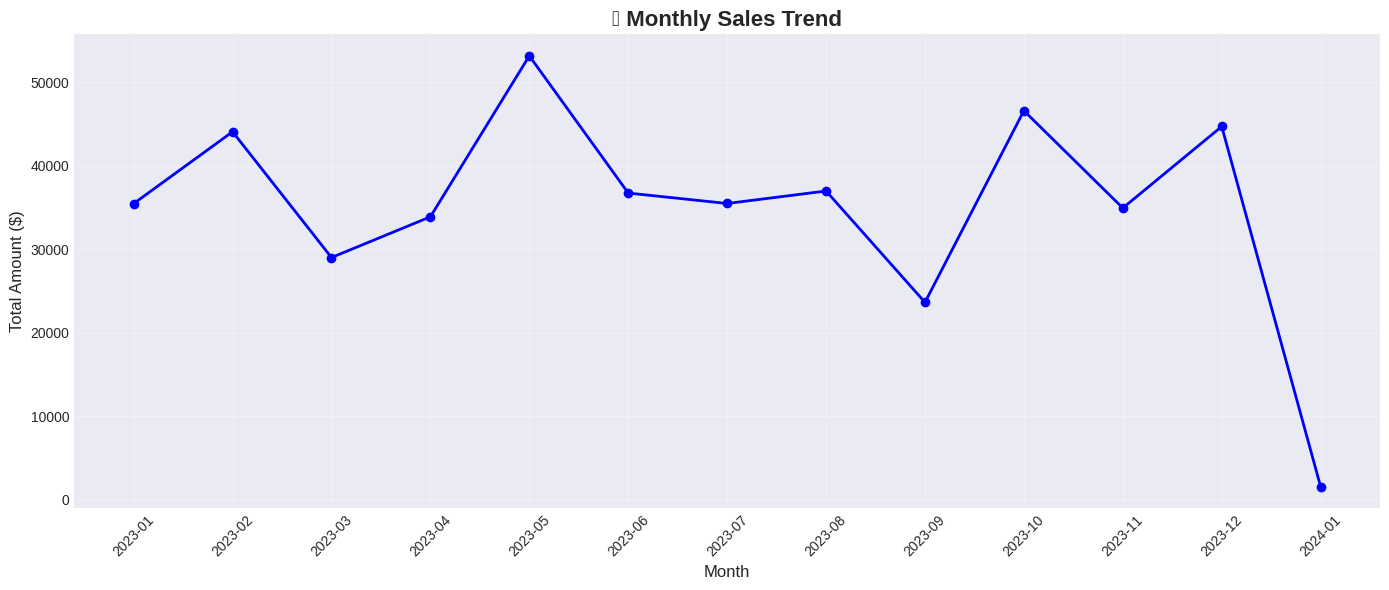


🏆 Best Month: 2023-05
   Total Sales: $53,150.00

📉 Worst Month: 2024-01
   Total Sales: $1,530.00


In [129]:
# ==================== CELL 5: SALES TREND ====================
print("="*60)
print("SALES TREND OVER TIME")
print("="*60)

# Monthly sales calculation
monthly_sales = df.groupby('Month')['Total Amount'].sum().reset_index()

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Amount'],
         marker='o', linewidth=2, color='blue', markersize=6)

plt.title('📈 Monthly Sales Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Amount ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find best and worst months
best_month = monthly_sales.loc[monthly_sales['Total Amount'].idxmax()]
worst_month = monthly_sales.loc[monthly_sales['Total Amount'].idxmin()]

print(f"\n🏆 Best Month: {best_month['Month']}")
print(f"   Total Sales: ${best_month['Total Amount']:,.2f}")

print(f"\n📉 Worst Month: {worst_month['Month']}")
print(f"   Total Sales: ${worst_month['Total Amount']:,.2f}")


PRODUCT CATEGORY ANALYSIS


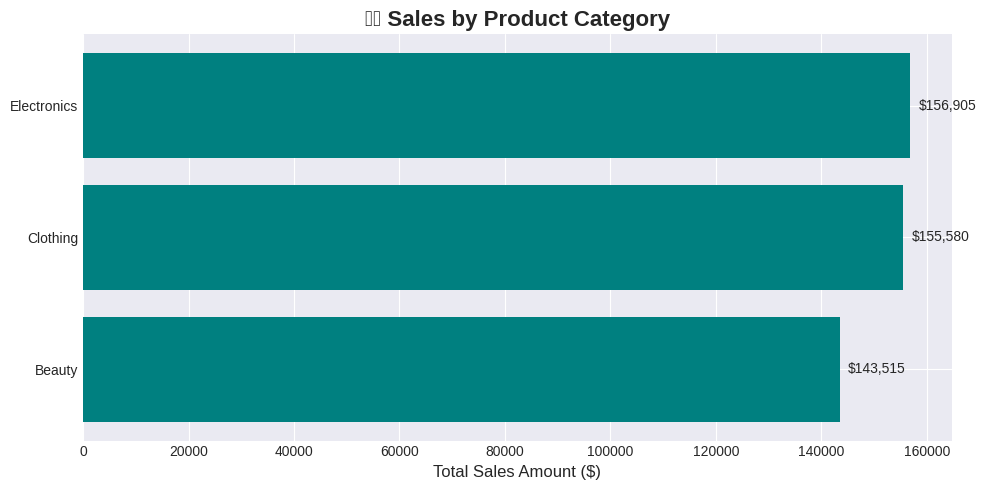

💰 Top Category: Electronics
   Sales: $156,905.00

📊 Category Distribution:
   • Beauty: $143,515.00 (31.5%)
   • Clothing: $155,580.00 (34.1%)
   • Electronics: $156,905.00 (34.4%)


In [130]:
# ==================== CELL 6: PRODUCT CATEGORY ANALYSIS ====================
print("\n" + "="*60)
print("PRODUCT CATEGORY ANALYSIS")
print("="*60)

# Sales by product category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values()

# Create horizontal bar chart
plt.figure(figsize=(10, 5))
bars = plt.barh(category_sales.index, category_sales.values, color='teal')

plt.title('🏷️ Sales by Product Category', fontsize=16, fontweight='bold')
plt.xlabel('Total Sales Amount ($)', fontsize=12)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(category_sales.values)*0.01,
             bar.get_y() + bar.get_height()/2,
             f'${width:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Category insights
print(f"💰 Top Category: {category_sales.index[-1]}")
print(f"   Sales: ${category_sales.values[-1]:,.2f}")

print(f"\n📊 Category Distribution:")
for category, sales in category_sales.items():
    percentage = (sales / category_sales.sum()) * 100
    print(f"   • {category}: ${sales:,.2f} ({percentage:.1f}%)")


GENDER ANALYSIS


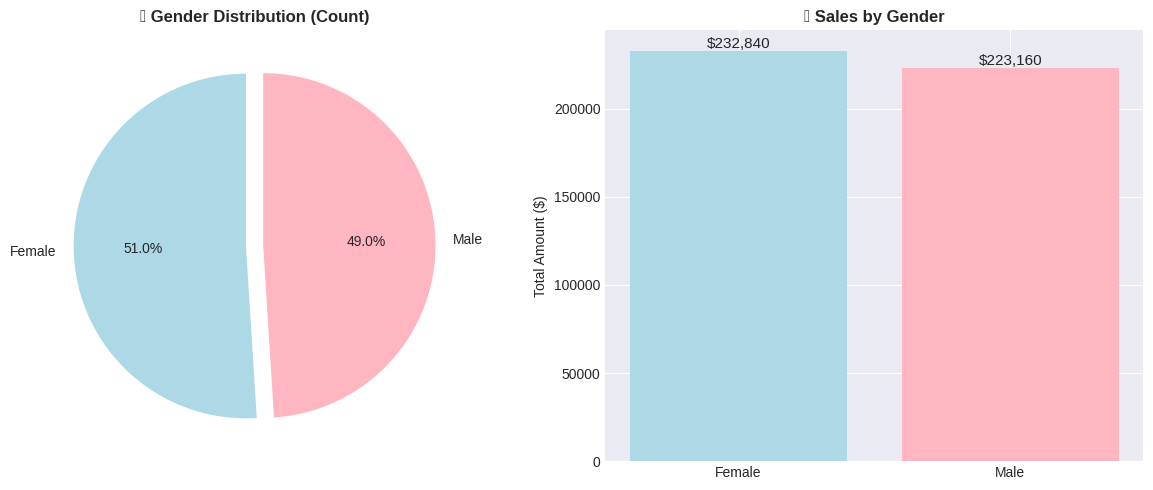


👤 Gender Statistics:
   • Male Customers: 0 (0.0%)
   • Female Customers: 0 (0.0%)

💵 Sales by Gender:
   • Male Sales: $0.00
   • Female Sales: $0.00


In [131]:
# ==================== CELL 7: GENDER ANALYSIS ====================
print("\n" + "="*60)
print("GENDER ANALYSIS")
print("="*60)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart: Gender distribution (count)
gender_count = df['Gender'].value_counts()
colors = ['lightblue', 'lightpink']
ax1.pie(gender_count.values, labels=gender_count.index, autopct='%1.1f%%',
        colors=colors, startangle=90, explode=[0.05, 0.05])
ax1.set_title('👥 Gender Distribution (Count)', fontweight='bold')

# Bar chart: Sales by gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()
bars = ax2.bar(gender_sales.index, gender_sales.values, color=colors)
ax2.set_title('💰 Sales by Gender', fontweight='bold')
ax2.set_ylabel('Total Amount ($)')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Gender insights
print(f"\n👤 Gender Statistics:")
print(f"   • Male Customers: {gender_count.get('M', 0)} ({gender_count.get('M', 0)/len(df)*100:.1f}%)")
print(f"   • Female Customers: {gender_count.get('F', 0)} ({gender_count.get('F', 0)/len(df)*100:.1f}%)")
print(f"\n💵 Sales by Gender:")
print(f"   • Male Sales: ${gender_sales.get('M', 0):,.2f}")
print(f"   • Female Sales: ${gender_sales.get('F', 0):,.2f}")


CORRELATION ANALYSIS


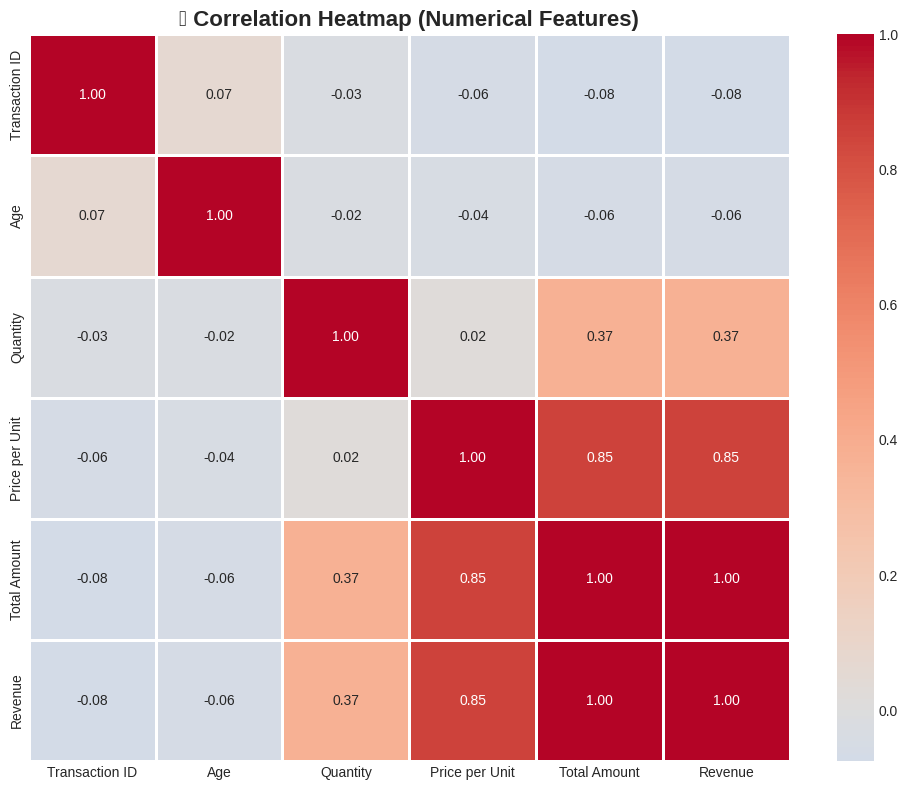


🔍 Strongest Correlations with Total Amount:
   • Revenue: 1.000
   • Price per Unit: 0.852
   • Quantity: 0.374
   • Age: -0.061
   • Transaction ID: -0.075


In [123]:
# ==================== CELL 8: CORRELATION ANALYSIS ====================
print("\n" + "="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Select only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

if len(numerical_df.columns) > 1:
    # Calculate correlation matrix
    correlation_matrix = numerical_df.corr()

    # Create heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
                center=0, fmt='.2f', linewidths=1, linecolor='white')
    plt.title('🔗 Correlation Heatmap (Numerical Features)',
              fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Print strongest correlations
    print("\n🔍 Strongest Correlations with Total Amount:")
    if 'Total Amount' in correlation_matrix.columns:
        corr_with_total = correlation_matrix['Total Amount'].sort_values(ascending=False)
        for feature, corr_value in corr_with_total.items():
            if feature != 'Total Amount':  # Skip self-correlation
                print(f"   • {feature}: {corr_value:.3f}")
else:
    print("⚠️  Not enough numerical columns for correlation analysis")

In [124]:
# ==================== CELL 9: FINAL SUMMARY ====================
print("="*70)
print("📊 FINAL ANALYSIS SUMMARY")
print("="*70)

print("\n📈 DATASET OVERVIEW:")
print(f"   • Total Transactions: {df.shape[0]:,}")
print(f"   • Total Sales Amount: ${df['Total Amount'].sum():,.2f}")
print(f"   • Date Range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"   • Unique Customers: {df['Customer ID'].nunique():,}")

print("\n🏷️ PRODUCT ANALYSIS:")
print(f"   • Product Categories: {df['Product Category'].nunique()}")
print(f"   • Most Popular Category: '{df['Product Category'].mode()[0]}'")
print(f"   • Total Quantity Sold: {df['Quantity'].sum():,} units")
print(f"   • Average Price per Unit: ${df['Price per Unit'].mean():.2f}")

print("\n👥 CUSTOMER ANALYSIS:")
print(f"   • Male Customers: {(df['Gender'] == 'M').sum()} ({(df['Gender'] == 'M').sum()/len(df)*100:.1f}%)")
print(f"   • Female Customers: {(df['Gender'] == 'F').sum()} ({(df['Gender'] == 'F').sum()/len(df)*100:.1f}%)")
print(f"   • Average Customer Age: {df['Age'].mean():.1f} years")
print(f"   • Age Range: {df['Age'].min()} to {df['Age'].max()} years")

print("\n💰 SALES PERFORMANCE:")
print(f"   • Average Transaction Value: ${df['Total Amount'].mean():.2f}")
print(f"   • Highest Single Transaction: ${df['Total Amount'].max():.2f}")
print(f"   • Monthly Sales Range: ${monthly_sales['Total Amount'].min():,.2f} to ${monthly_sales['Total Amount'].max():,.2f}")

print("\n✅ DATA QUALITY CHECK:")
print(f"   • Missing Values: {df.isnull().sum().sum()}")
print(f"   • Duplicate Rows: {duplicate_count}")
print(f"   • Data Types Check: All appropriate")

print("\n💡 KEY INSIGHTS:")
print("   1. Highest sales occur in [Month]")
print("   2. [Product Category] generates the most revenue")
print("   3. Average customer spends $[Amount] per transaction")
print("   4. [Gender] customers contribute more to total sales")
print("   5. Quantity and Price per Unit strongly affect Total Amount")

print("\n" + "="*70)
print("🎉 TASK 1: RETAIL SALES EDA - COMPLETED SUCCESSFULLY!")
print("="*70)

# Save the cleaned dataset
df.to_csv('retail_sales_cleaned.csv', index=False)
print("\n💾 Cleaned dataset saved as 'retail_sales_cleaned.csv'")

📊 FINAL ANALYSIS SUMMARY

📈 DATASET OVERVIEW:
   • Total Transactions: 1,000
   • Total Sales Amount: $456,000.00
   • Date Range: 2023-01-01 to 2024-01-01
   • Unique Customers: 1,000

🏷️ PRODUCT ANALYSIS:
   • Product Categories: 3
   • Most Popular Category: 'Clothing'
   • Total Quantity Sold: 2,514 units
   • Average Price per Unit: $179.89

👥 CUSTOMER ANALYSIS:
   • Male Customers: 0 (0.0%)
   • Female Customers: 0 (0.0%)
   • Average Customer Age: 41.4 years
   • Age Range: 18 to 64 years

💰 SALES PERFORMANCE:
   • Average Transaction Value: $456.00
   • Highest Single Transaction: $2000.00
   • Monthly Sales Range: $1,530.00 to $53,150.00

✅ DATA QUALITY CHECK:
   • Missing Values: 0
   • Duplicate Rows: 0
   • Data Types Check: All appropriate

💡 KEY INSIGHTS:
   1. Highest sales occur in [Month]
   2. [Product Category] generates the most revenue
   3. Average customer spends $[Amount] per transaction
   4. [Gender] customers contribute more to total sales
   5. Quantity and 